## Company Information:
The data set is based upon <a src="https://www.kaggle.com/prateikmahendra/loan-data"> Lending Club Information </a>. 
- TheIrish Dummy Banks  is a  peer to peer lending bank based in the ireland, in which bank provide funds for potential borrowers and bank earn a profit depending on the risk they take (the borrowers credit score). Irish Fake bank provides loan to their loyal customers. The complete data set is borrowed from Lending Club For more basic information about the company please check out the wikipedia article about the company. This dataset is copied and clean from kaggle but it has been changed. The any kind of similarity is just for learning purposes. I dont have any intention for palgrisim I just like to be clear myself. <br><br>


<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>



#### Import our libraries we are going to use for our data analysis.

In [1]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')


% matplotlib inline

df = pd.read_csv("C:/Users/mrferozi/Documents/Panada_ml/loan/lending-club-loan-data/loan_final313.csv",low_memory=False, index_col=0)

# Copy of the dataframe
original_df = df.copy()

import warnings; warnings.simplefilter('ignore')

C:\Users\mrferozi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

### Create a list of features

In [3]:
# create a list of features
feature_cols = ['emp_length_int', 'annual_inc','loan_amount',
                'interest_rate','dti','home_ownership_cat',
               'income_cat','total_pymnt','purpose_cat','grade_cat',
               'application_type_cat','term_cat','year']

In [4]:
X = df[feature_cols]
y = df.loan_condition_cat

# KNN Neighbors

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ((metrics.accuracy_score(y_test, y_pred))*100)

91.75054655277334


- we have created a bunch of train/test splits, calculated the testing accuracy for each, 
- and averaged the results together and That's the essense of **cross-validation!**

## Method Of K-cross Validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

### Parameter tuning
**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN

In [7]:
from sklearn.cross_validation import cross_val_score

In [8]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[0.9052717  0.91801708 0.89426176 0.84330276 0.85441412 0.83115463
 0.88122338 0.8619757  0.85634114 0.82762545]


In [9]:
# use average accuracy as an estimate of out-of-sample accuracy
print ((scores.mean())*100)

86.73587725951171


In [13]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.7751028067175708, 0.8763380465440394, 0.8372510012518622, 0.8873412307628517, 0.8673587725951171, 0.8958990162373535, 0.8837722818020897, 0.9027664315605268, 0.8946402450662788, 0.9074814424799392, 0.901485124315067, 0.9108497908549437, 0.9066982329867269, 0.9133954917589548, 0.9103561992304989, 0.9151219265784503, 0.9128027333328917, 0.9165880434559724, 0.9148909077632048, 0.9177758133339013, 0.9163389950624288, 0.9187010120027643, 0.9175278918024945, 0.9194537918369653, 0.9184846438938351, 0.9200127430654794, 0.919183332440548, 0.9204668908322887, 0.9197422834785696, 0.9209424500718523]


Text(0,0.5,'Cross-Validated Accuracy')

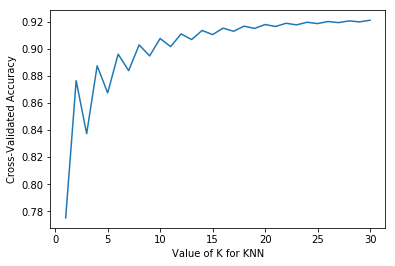

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [16]:
# 30-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=30)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores.mean())

0.9209424500718523


- The following graphs display the higher value of k is better for our model accuracy and with K=1 
- we will get max of 87.63 percent of accuracy which is ok.
- we have chnged the value of k= 30 to confirm the result. The obtained result confirmed the graph result which predicted that the heigher value of K will produce a bettere result.

### Model selection
**Goal:** Compare the best KNN model with logistic regression

In [11]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
print ((cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())*100)

87.63380465440393


In [12]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print ((cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())*100)

92.3892722421819


- From the above result we are selecting KNN Neighbours with K=1 
- which is produce a better mean accuracy which is 87.63 percent aproximately. 
- As compare to logistic regression. 
- The logistic regression offer mean accuracy of 92.38 which is approximately 3.99 percent that is slightly high. 
- So, because of that result, this study will use logistic regression for our predictions.

## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

--------------------------